In [ ]:
import pandas as pd

# Subject 0 (Time window 200 time steps)

In [353]:
subject0_Imagery_hands_200 = pd.read_csv("/content/subject0_Imagery_hands_200.csv")
subject0_Imagery_tongues_200 = pd.read_csv("/content/subject0_Imagery_tongues_200.csv")
subject0_Real_hands_200 = pd.read_csv("/content/subject0_Real_hands_200.csv")
subject0_Real_tongues_200 = pd.read_csv("/content/subject0_Real_tongues_200.csv")

## Makes data in real and imagery forms

In [354]:
Imagery_frames = [subject0_Imagery_hands_200, subject0_Imagery_tongues_200]
Imagery_frames = pd.concat(Imagery_frames)
Imagery_frames['is_execution'] = 0

In [355]:
Real_frames = [subject0_Real_hands_200, subject0_Real_tongues_200]
Real_frames = pd.concat(Real_frames)
Real_frames['is_execution'] = 1

In [356]:
whole_dataframe = [Imagery_frames, Real_frames]
whole_dataframe = pd.concat(whole_dataframe)
whole_dataframe = whole_dataframe.astype({'elecro_idx':'string'})
whole_dataframe

,elecro_idx,trial_idx,sub_trial_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,B5_P,B5_RP,is_execution
0,0,1,0,0.0,0.0,0.0,0.0,14.860000,0.011669,1.319482,0.001036,0.129027,0.000101,0
1,0,1,1,0.0,0.0,0.0,0.0,16.998580,0.030483,2.309540,0.004142,0.165870,0.000297,0
2,0,1,2,0.0,0.0,0.0,0.0,7.400530,0.019949,0.828173,0.002232,0.228363,0.000616,0
3,0,1,3,0.0,0.0,0.0,0.0,4.862521,0.007246,0.751399,0.001120,0.157305,0.000234,0
4,0,1,4,0.0,0.0,0.0,0.0,8.637095,0.026290,0.837616,0.002550,0.381272,0.001161,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20695,45,59,10,0.0,0.0,0.0,0.0,12.117948,0.004546,1.161496,0.000436,0.318748,0.000120,1
20696,45,59,11,0.0,0.0,0.0,0.0,7.969527,0.004765,0.982211,0.000587,0.141021,0.000084,1
20697,45,59,12,0.0,0.0,0.0,0.0,6.879390,0.002318,0.604631,0.000204,0.204520,0.000069,1
20698,45,59,13,0.0,0.0,0.0,0.0,9.371105,0.003973,0.812724,0.000345,0.269150,0.000114,1


In [357]:
df_onehot = pd.get_dummies(whole_dataframe['elecro_idx'])

In [358]:
whole_dataframe = pd.concat([whole_dataframe, df_onehot], axis=1)
whole_dataframe = whole_dataframe.drop(['elecro_idx'], axis=1) # Deleting electro_idx column after we did one hot encoding
whole_dataframe

,trial_idx,sub_trial_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,...,41,42,43,44,45,5,6,7,8,9
0,1,0,0.0,0.0,0.0,0.0,14.860000,0.011669,1.319482,0.001036,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0.0,0.0,0.0,0.0,16.998580,0.030483,2.309540,0.004142,...,0,0,0,0,0,0,0,0,0,0
2,1,2,0.0,0.0,0.0,0.0,7.400530,0.019949,0.828173,0.002232,...,0,0,0,0,0,0,0,0,0,0
3,1,3,0.0,0.0,0.0,0.0,4.862521,0.007246,0.751399,0.001120,...,0,0,0,0,0,0,0,0,0,0
4,1,4,0.0,0.0,0.0,0.0,8.637095,0.026290,0.837616,0.002550,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20695,59,10,0.0,0.0,0.0,0.0,12.117948,0.004546,1.161496,0.000436,...,0,0,0,0,1,0,0,0,0,0
20696,59,11,0.0,0.0,0.0,0.0,7.969527,0.004765,0.982211,0.000587,...,0,0,0,0,1,0,0,0,0,0
20697,59,12,0.0,0.0,0.0,0.0,6.879390,0.002318,0.604631,0.000204,...,0,0,0,0,1,0,0,0,0,0
20698,59,13,0.0,0.0,0.0,0.0,9.371105,0.003973,0.812724,0.000345,...,0,0,0,0,1,0,0,0,0,0


In [359]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [360]:
whole_dataframe.columns

Index(['trial_idx', 'sub_trial_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P',
       'B3_RP', 'B4_P', 'B4_RP', 'B5_P', 'B5_RP', 'is_execution', '0', '1',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42',
       '43', '44', '45', '5', '6', '7', '8', '9'],
      dtype='object')

In [361]:
features = ['B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P',
       'B3_RP', 'B4_P', 'B4_RP', 'B5_P', 'B5_RP', 'is_execution', '0', '1',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42',
       '43', '44', '45', '5', '6', '7', '8', '9']
X = whole_dataframe.loc[:, features]
y = whole_dataframe.loc[:, ['is_execution']]

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

### SCV

In [363]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [364]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [365]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

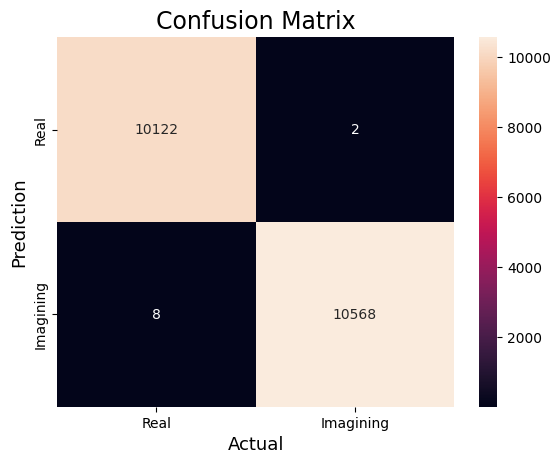

In [366]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [367]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

0.9995169082125603


### Random Forest

In [368]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [369]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

<ipython-input-369-2584e0968a9b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [370]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

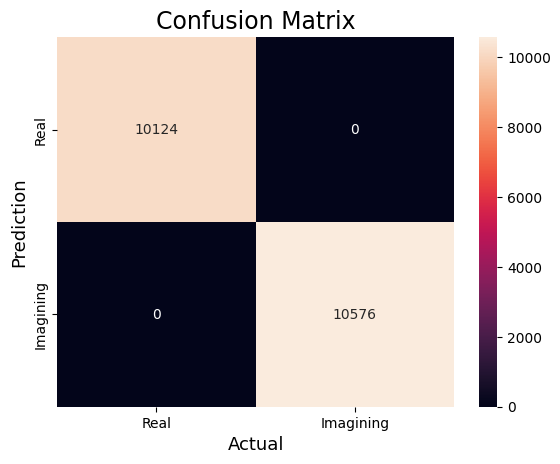

In [371]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [372]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

1.0


## Makes data in hands and tongues forms

In [373]:
hand_frames = [subject0_Imagery_hands_200, subject0_Real_hands_200]
hand_frames = pd.concat(hand_frames)
hand_frames['is_tongue'] = 0

In [374]:
tongues_frames = [subject0_Imagery_tongues_200, subject0_Real_tongues_200]
tongues_frames = pd.concat(tongues_frames)
tongues_frames['is_tongue'] = 1

In [375]:
whole_dataframe = [hand_frames, tongues_frames]
whole_dataframe = pd.concat(whole_dataframe)
whole_dataframe = whole_dataframe.astype({'elecro_idx':'string'})
whole_dataframe

,elecro_idx,trial_idx,sub_trial_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,B5_P,B5_RP,is_tongue
0,0,1,0,0.0,0.0,0.0,0.0,14.860000,0.011669,1.319482,0.001036,0.129027,0.000101,0
1,0,1,1,0.0,0.0,0.0,0.0,16.998580,0.030483,2.309540,0.004142,0.165870,0.000297,0
2,0,1,2,0.0,0.0,0.0,0.0,7.400530,0.019949,0.828173,0.002232,0.228363,0.000616,0
3,0,1,3,0.0,0.0,0.0,0.0,4.862521,0.007246,0.751399,0.001120,0.157305,0.000234,0
4,0,1,4,0.0,0.0,0.0,0.0,8.637095,0.026290,0.837616,0.002550,0.381272,0.001161,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20695,45,59,10,0.0,0.0,0.0,0.0,12.117948,0.004546,1.161496,0.000436,0.318748,0.000120,1
20696,45,59,11,0.0,0.0,0.0,0.0,7.969527,0.004765,0.982211,0.000587,0.141021,0.000084,1
20697,45,59,12,0.0,0.0,0.0,0.0,6.879390,0.002318,0.604631,0.000204,0.204520,0.000069,1
20698,45,59,13,0.0,0.0,0.0,0.0,9.371105,0.003973,0.812724,0.000345,0.269150,0.000114,1


In [376]:
df_onehot = pd.get_dummies(whole_dataframe['elecro_idx'])

In [377]:
whole_dataframe = pd.concat([whole_dataframe, df_onehot], axis=1)
whole_dataframe = whole_dataframe.drop(['elecro_idx'], axis=1) # Deleting electro_idx column after we did one hot encoding
whole_dataframe

,trial_idx,sub_trial_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,...,41,42,43,44,45,5,6,7,8,9
0,1,0,0.0,0.0,0.0,0.0,14.860000,0.011669,1.319482,0.001036,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0.0,0.0,0.0,0.0,16.998580,0.030483,2.309540,0.004142,...,0,0,0,0,0,0,0,0,0,0
2,1,2,0.0,0.0,0.0,0.0,7.400530,0.019949,0.828173,0.002232,...,0,0,0,0,0,0,0,0,0,0
3,1,3,0.0,0.0,0.0,0.0,4.862521,0.007246,0.751399,0.001120,...,0,0,0,0,0,0,0,0,0,0
4,1,4,0.0,0.0,0.0,0.0,8.637095,0.026290,0.837616,0.002550,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20695,59,10,0.0,0.0,0.0,0.0,12.117948,0.004546,1.161496,0.000436,...,0,0,0,0,1,0,0,0,0,0
20696,59,11,0.0,0.0,0.0,0.0,7.969527,0.004765,0.982211,0.000587,...,0,0,0,0,1,0,0,0,0,0
20697,59,12,0.0,0.0,0.0,0.0,6.879390,0.002318,0.604631,0.000204,...,0,0,0,0,1,0,0,0,0,0
20698,59,13,0.0,0.0,0.0,0.0,9.371105,0.003973,0.812724,0.000345,...,0,0,0,0,1,0,0,0,0,0


In [378]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [379]:
whole_dataframe.columns

Index(['trial_idx', 'sub_trial_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P',
       'B3_RP', 'B4_P', 'B4_RP', 'B5_P', 'B5_RP', 'is_tongue', '0', '1', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43',
       '44', '45', '5', '6', '7', '8', '9'],
      dtype='object')

In [380]:
features = ['B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P',
       'B3_RP', 'B4_P', 'B4_RP', 'B5_P', 'B5_RP', 'is_tongue', '0', '1',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42',
       '43', '44', '45', '5', '6', '7', '8', '9']
X = whole_dataframe.loc[:, features]
y = whole_dataframe.loc[:, ['is_tongue']]

In [381]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

### SCV

In [382]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [383]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [384]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

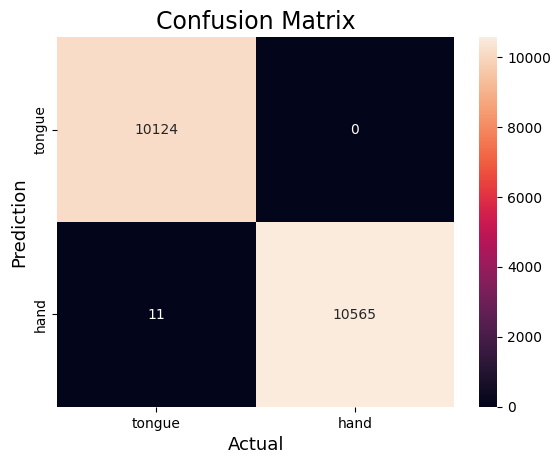

In [385]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['tongue','hand'],
            yticklabels=['tongue','hand'])
# Look at next comment.
# we want to make sure than tongue, hand is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [386]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

0.9994685990338165


### Random Forest

In [387]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [388]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

<ipython-input-388-2584e0968a9b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [389]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

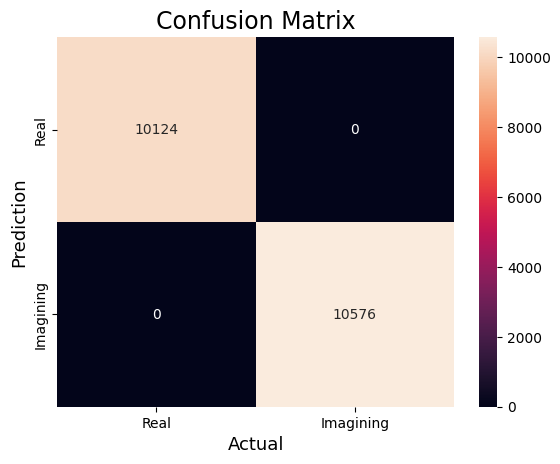

In [390]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [391]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

1.0


# Subject 0 (Time window 500 time steps)

In [314]:
subject0_Imagery_hands_500 = pd.read_csv("/content/subject0_Imagery_hands_500.csv")
subject0_Imagery_tongues_500 = pd.read_csv("/content/subject0_Imagery_tongues_500.csv")
subject0_Real_hands_500 = pd.read_csv("/content/subject0_Real_hands_500.csv")
subject0_Real_tongues_500 = pd.read_csv("/content/subject0_Real_tongues_500.csv")

## Makes data in real and imagery forms

In [315]:
Imagery_frames = [subject0_Imagery_hands_500, subject0_Imagery_tongues_500]
Imagery_frames = pd.concat(Imagery_frames)
Imagery_frames['is_execution'] = 0

In [316]:
Real_frames = [subject0_Real_hands_500, subject0_Real_tongues_500]
Real_frames = pd.concat(Real_frames)
Real_frames['is_execution'] = 1

In [317]:
whole_dataframe = [Imagery_frames, Real_frames]
whole_dataframe = pd.concat(whole_dataframe)
whole_dataframe = whole_dataframe.astype({'elecro_idx':'string'})
whole_dataframe

,elecro_idx,trial_idx,sub_trial_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,B5_P,B5_RP,is_execution
0,0,1,0,197.675861,0.170860,46.408524,0.040113,10.770330,0.009309,1.586216,0.001371,0.130968,0.000113,0
1,0,1,1,158.318979,0.123755,56.844351,0.044434,7.250197,0.005667,1.022814,0.000800,0.187711,0.000147,0
2,0,1,2,56.682310,0.158952,23.788405,0.066709,9.838210,0.027589,1.700359,0.004768,0.402751,0.001129,0
3,0,1,3,179.956666,0.163425,43.033610,0.039080,6.830468,0.006203,1.938090,0.001760,0.374504,0.000340,0
4,0,1,4,63.079600,0.123333,35.764515,0.069927,5.787596,0.011316,0.932987,0.001824,0.178467,0.000349,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,45,59,1,476.301522,0.159744,59.603396,0.019990,7.735160,0.002594,1.108131,0.000372,0.200107,0.000067,1
8276,45,59,2,475.673045,0.203571,121.172556,0.051857,10.280201,0.004400,1.490306,0.000638,0.552589,0.000236,1
8277,45,59,3,1449.749494,0.112864,49.303924,0.003838,3.519477,0.000274,0.687711,0.000054,0.289999,0.000023,1
8278,45,59,4,864.393626,0.077384,109.520839,0.009805,6.661905,0.000596,1.130352,0.000101,0.201954,0.000018,1


In [318]:
df_onehot = pd.get_dummies(whole_dataframe['elecro_idx'])

In [319]:
whole_dataframe = pd.concat([whole_dataframe, df_onehot], axis=1)
whole_dataframe = whole_dataframe.drop(['elecro_idx'], axis=1) # Deleting electro_idx column after we did one hot encoding
whole_dataframe

,trial_idx,sub_trial_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,...,41,42,43,44,45,5,6,7,8,9
0,1,0,197.675861,0.170860,46.408524,0.040113,10.770330,0.009309,1.586216,0.001371,...,0,0,0,0,0,0,0,0,0,0
1,1,1,158.318979,0.123755,56.844351,0.044434,7.250197,0.005667,1.022814,0.000800,...,0,0,0,0,0,0,0,0,0,0
2,1,2,56.682310,0.158952,23.788405,0.066709,9.838210,0.027589,1.700359,0.004768,...,0,0,0,0,0,0,0,0,0,0
3,1,3,179.956666,0.163425,43.033610,0.039080,6.830468,0.006203,1.938090,0.001760,...,0,0,0,0,0,0,0,0,0,0
4,1,4,63.079600,0.123333,35.764515,0.069927,5.787596,0.011316,0.932987,0.001824,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,59,1,476.301522,0.159744,59.603396,0.019990,7.735160,0.002594,1.108131,0.000372,...,0,0,0,0,1,0,0,0,0,0
8276,59,2,475.673045,0.203571,121.172556,0.051857,10.280201,0.004400,1.490306,0.000638,...,0,0,0,0,1,0,0,0,0,0
8277,59,3,1449.749494,0.112864,49.303924,0.003838,3.519477,0.000274,0.687711,0.000054,...,0,0,0,0,1,0,0,0,0,0
8278,59,4,864.393626,0.077384,109.520839,0.009805,6.661905,0.000596,1.130352,0.000101,...,0,0,0,0,1,0,0,0,0,0


In [320]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [321]:
whole_dataframe.columns

Index(['trial_idx', 'sub_trial_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P',
       'B3_RP', 'B4_P', 'B4_RP', 'B5_P', 'B5_RP', 'is_execution', '0', '1',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42',
       '43', '44', '45', '5', '6', '7', '8', '9'],
      dtype='object')

In [322]:
features = ['B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P',
       'B3_RP', 'B4_P', 'B4_RP', 'B5_P', 'B5_RP', 'is_execution', '0', '1',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42',
       '43', '44', '45', '5', '6', '7', '8', '9']
X = whole_dataframe.loc[:, features]
y = whole_dataframe.loc[:, ['is_execution']]

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

### SCV

In [324]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [325]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [326]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

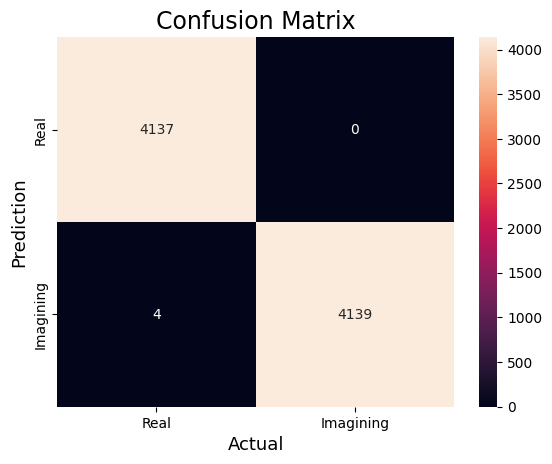

In [327]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [328]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

0.9995169082125603


### Random Forest

In [329]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [330]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

<ipython-input-330-2584e0968a9b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [331]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

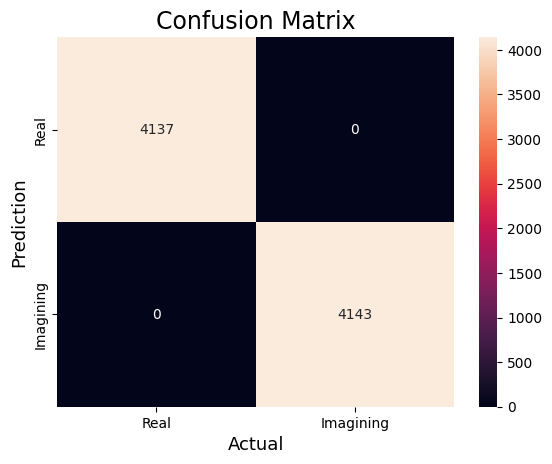

In [332]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [333]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

1.0


## Makes data in hands and tongues forms

In [334]:
hand_frames = [subject0_Imagery_hands_500, subject0_Real_hands_500]
hand_frames = pd.concat(hand_frames)
hand_frames['is_tongue'] = 0

In [335]:
tongues_frames = [subject0_Imagery_tongues_500, subject0_Real_tongues_500]
tongues_frames = pd.concat(tongues_frames)
tongues_frames['is_tongue'] = 1

In [336]:
whole_dataframe = [hand_frames, tongues_frames]
whole_dataframe = pd.concat(whole_dataframe)
whole_dataframe = whole_dataframe.astype({'elecro_idx':'string'})
whole_dataframe

,elecro_idx,trial_idx,sub_trial_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,B5_P,B5_RP,is_tongue
0,0,1,0,197.675861,0.170860,46.408524,0.040113,10.770330,0.009309,1.586216,0.001371,0.130968,0.000113,0
1,0,1,1,158.318979,0.123755,56.844351,0.044434,7.250197,0.005667,1.022814,0.000800,0.187711,0.000147,0
2,0,1,2,56.682310,0.158952,23.788405,0.066709,9.838210,0.027589,1.700359,0.004768,0.402751,0.001129,0
3,0,1,3,179.956666,0.163425,43.033610,0.039080,6.830468,0.006203,1.938090,0.001760,0.374504,0.000340,0
4,0,1,4,63.079600,0.123333,35.764515,0.069927,5.787596,0.011316,0.932987,0.001824,0.178467,0.000349,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,45,59,1,476.301522,0.159744,59.603396,0.019990,7.735160,0.002594,1.108131,0.000372,0.200107,0.000067,1
8276,45,59,2,475.673045,0.203571,121.172556,0.051857,10.280201,0.004400,1.490306,0.000638,0.552589,0.000236,1
8277,45,59,3,1449.749494,0.112864,49.303924,0.003838,3.519477,0.000274,0.687711,0.000054,0.289999,0.000023,1
8278,45,59,4,864.393626,0.077384,109.520839,0.009805,6.661905,0.000596,1.130352,0.000101,0.201954,0.000018,1


In [337]:
df_onehot = pd.get_dummies(whole_dataframe['elecro_idx'])

In [338]:
whole_dataframe = pd.concat([whole_dataframe, df_onehot], axis=1)
whole_dataframe = whole_dataframe.drop(['elecro_idx'], axis=1) # Deleting electro_idx column after we did one hot encoding
whole_dataframe

,trial_idx,sub_trial_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,...,41,42,43,44,45,5,6,7,8,9
0,1,0,197.675861,0.170860,46.408524,0.040113,10.770330,0.009309,1.586216,0.001371,...,0,0,0,0,0,0,0,0,0,0
1,1,1,158.318979,0.123755,56.844351,0.044434,7.250197,0.005667,1.022814,0.000800,...,0,0,0,0,0,0,0,0,0,0
2,1,2,56.682310,0.158952,23.788405,0.066709,9.838210,0.027589,1.700359,0.004768,...,0,0,0,0,0,0,0,0,0,0
3,1,3,179.956666,0.163425,43.033610,0.039080,6.830468,0.006203,1.938090,0.001760,...,0,0,0,0,0,0,0,0,0,0
4,1,4,63.079600,0.123333,35.764515,0.069927,5.787596,0.011316,0.932987,0.001824,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8275,59,1,476.301522,0.159744,59.603396,0.019990,7.735160,0.002594,1.108131,0.000372,...,0,0,0,0,1,0,0,0,0,0
8276,59,2,475.673045,0.203571,121.172556,0.051857,10.280201,0.004400,1.490306,0.000638,...,0,0,0,0,1,0,0,0,0,0
8277,59,3,1449.749494,0.112864,49.303924,0.003838,3.519477,0.000274,0.687711,0.000054,...,0,0,0,0,1,0,0,0,0,0
8278,59,4,864.393626,0.077384,109.520839,0.009805,6.661905,0.000596,1.130352,0.000101,...,0,0,0,0,1,0,0,0,0,0


In [339]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [340]:
whole_dataframe.columns

Index(['trial_idx', 'sub_trial_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P',
       'B3_RP', 'B4_P', 'B4_RP', 'B5_P', 'B5_RP', 'is_tongue', '0', '1', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43',
       '44', '45', '5', '6', '7', '8', '9'],
      dtype='object')

In [341]:
features = ['B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P',
       'B3_RP', 'B4_P', 'B4_RP', 'B5_P', 'B5_RP', 'is_tongue', '0', '1',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42',
       '43', '44', '45', '5', '6', '7', '8', '9']
X = whole_dataframe.loc[:, features]
y = whole_dataframe.loc[:, ['is_tongue']]

In [342]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

### SCV

In [343]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [344]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [345]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

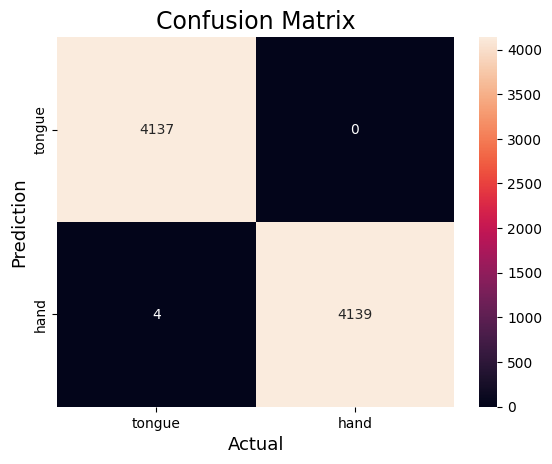

In [346]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['tongue','hand'],
            yticklabels=['tongue','hand'])
# Look at next comment.
# we want to make sure than tongue, hand is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [347]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

0.9995169082125603


### Random Forest

In [348]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [349]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

<ipython-input-349-2584e0968a9b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [350]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

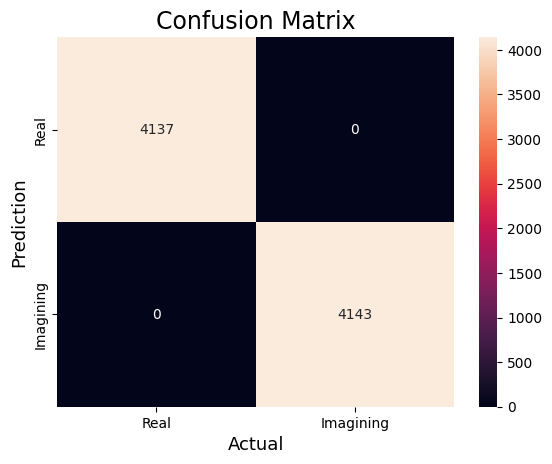

In [351]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [352]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

1.0


# Subject 0 (Time window 1000 time steps)

In [275]:
subject0_Imagery_hands_1000 = pd.read_csv("/content/subject0_Imagery_hands_1000.csv")
subject0_Imagery_tongues_1000 = pd.read_csv("/content/subject0_Imagery_tongues_1000.csv")
subject0_Real_hands_1000 = pd.read_csv("/content/subject0_Real_hands_1000.csv")
subject0_Real_tongues_1000 = pd.read_csv("/content/subject0_Real_tongues_1000.csv")

## Makes data in real and imagery forms

In [276]:
Imagery_frames = [subject0_Imagery_hands_1000, subject0_Imagery_tongues_1000]
Imagery_frames = pd.concat(Imagery_frames)
Imagery_frames['is_execution'] = 0

In [277]:
Real_frames = [subject0_Real_hands_1000, subject0_Real_tongues_1000]
Real_frames = pd.concat(Real_frames)
Real_frames['is_execution'] = 1

In [278]:
whole_dataframe = [Imagery_frames, Real_frames]
whole_dataframe = pd.concat(whole_dataframe)
whole_dataframe = whole_dataframe.astype({'elecro_idx':'string'})
whole_dataframe

,elecro_idx,trial_idx,sub_trial_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,B5_P,B5_RP,is_execution
0,0,1,0,101.020963,0.083812,28.771354,0.023870,9.414104,0.007810,1.352213,0.001122,0.193146,0.000160,0
1,0,1,1,74.379737,0.097522,28.269529,0.037065,8.860542,0.011617,2.107767,0.002764,0.410340,0.000538,0
2,0,1,2,32.549472,0.061638,37.246506,0.070533,7.351229,0.013921,1.000528,0.001895,0.291386,0.000552,0
3,0,3,0,132.360279,0.138689,34.704762,0.036364,11.585315,0.012139,1.145987,0.001201,0.432439,0.000453,0
4,0,3,1,106.966795,0.076490,34.695653,0.024810,8.286155,0.005925,1.480095,0.001058,0.241182,0.000172,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,45,58,1,1902.788039,0.193095,117.786515,0.011953,8.018295,0.000814,1.916762,0.000195,0.391437,0.000040,1
4136,45,58,2,513.235825,0.053718,95.439580,0.009989,5.439558,0.000569,1.011053,0.000106,0.326788,0.000034,1
4137,45,59,0,778.371432,0.103481,53.746802,0.007145,6.192176,0.000823,1.510732,0.000201,0.196694,0.000026,1
4138,45,59,1,656.013514,0.081848,84.905422,0.010593,7.029512,0.000877,1.056721,0.000132,0.428438,0.000053,1


In [279]:
df_onehot = pd.get_dummies(whole_dataframe['elecro_idx'])

In [280]:
whole_dataframe = pd.concat([whole_dataframe, df_onehot], axis=1)
whole_dataframe = whole_dataframe.drop(['elecro_idx'], axis=1) # Deleting electro_idx column after we did one hot encoding
whole_dataframe

,trial_idx,sub_trial_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,...,41,42,43,44,45,5,6,7,8,9
0,1,0,101.020963,0.083812,28.771354,0.023870,9.414104,0.007810,1.352213,0.001122,...,0,0,0,0,0,0,0,0,0,0
1,1,1,74.379737,0.097522,28.269529,0.037065,8.860542,0.011617,2.107767,0.002764,...,0,0,0,0,0,0,0,0,0,0
2,1,2,32.549472,0.061638,37.246506,0.070533,7.351229,0.013921,1.000528,0.001895,...,0,0,0,0,0,0,0,0,0,0
3,3,0,132.360279,0.138689,34.704762,0.036364,11.585315,0.012139,1.145987,0.001201,...,0,0,0,0,0,0,0,0,0,0
4,3,1,106.966795,0.076490,34.695653,0.024810,8.286155,0.005925,1.480095,0.001058,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,58,1,1902.788039,0.193095,117.786515,0.011953,8.018295,0.000814,1.916762,0.000195,...,0,0,0,0,1,0,0,0,0,0
4136,58,2,513.235825,0.053718,95.439580,0.009989,5.439558,0.000569,1.011053,0.000106,...,0,0,0,0,1,0,0,0,0,0
4137,59,0,778.371432,0.103481,53.746802,0.007145,6.192176,0.000823,1.510732,0.000201,...,0,0,0,0,1,0,0,0,0,0
4138,59,1,656.013514,0.081848,84.905422,0.010593,7.029512,0.000877,1.056721,0.000132,...,0,0,0,0,1,0,0,0,0,0


In [281]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [282]:
whole_dataframe.columns

Index(['trial_idx', 'sub_trial_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P',
       'B3_RP', 'B4_P', 'B4_RP', 'B5_P', 'B5_RP', 'is_execution', '0', '1',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42',
       '43', '44', '45', '5', '6', '7', '8', '9'],
      dtype='object')

In [283]:
features = ['B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P',
       'B3_RP', 'B4_P', 'B4_RP', 'B5_P', 'B5_RP', 'is_execution', '0', '1',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42',
       '43', '44', '45', '5', '6', '7', '8', '9']
X = whole_dataframe.loc[:, features]
y = whole_dataframe.loc[:, ['is_execution']]

In [284]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

### SCV

In [285]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [286]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [287]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

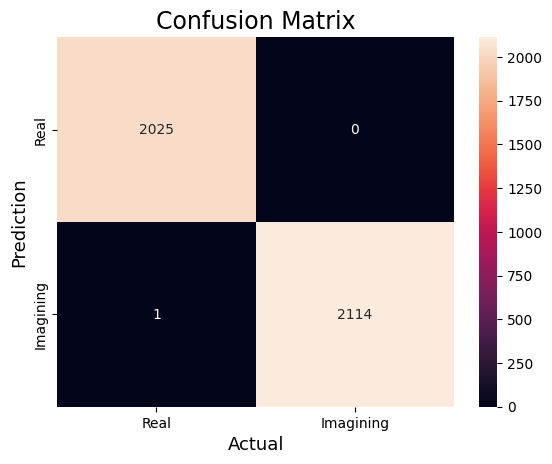

In [288]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [289]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

0.9997584541062802


### Random Forest

In [290]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [291]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

<ipython-input-291-2584e0968a9b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [292]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

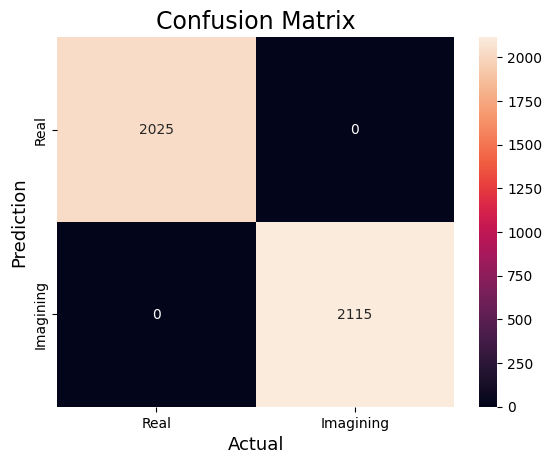

In [293]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [294]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

1.0


## Makes data in hands and tongues forms

In [295]:
hand_frames = [subject0_Imagery_hands_1000, subject0_Real_hands_1000]
hand_frames = pd.concat(hand_frames)
hand_frames['is_tongue'] = 0

In [296]:
tongues_frames = [subject0_Imagery_tongues_1000, subject0_Real_tongues_1000]
tongues_frames = pd.concat(tongues_frames)
tongues_frames['is_tongue'] = 1

In [297]:
whole_dataframe = [hand_frames, tongues_frames]
whole_dataframe = pd.concat(whole_dataframe)
whole_dataframe = whole_dataframe.astype({'elecro_idx':'string'})
whole_dataframe

,elecro_idx,trial_idx,sub_trial_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,B5_P,B5_RP,is_tongue
0,0,1,0,101.020963,0.083812,28.771354,0.023870,9.414104,0.007810,1.352213,0.001122,0.193146,0.000160,0
1,0,1,1,74.379737,0.097522,28.269529,0.037065,8.860542,0.011617,2.107767,0.002764,0.410340,0.000538,0
2,0,1,2,32.549472,0.061638,37.246506,0.070533,7.351229,0.013921,1.000528,0.001895,0.291386,0.000552,0
3,0,3,0,132.360279,0.138689,34.704762,0.036364,11.585315,0.012139,1.145987,0.001201,0.432439,0.000453,0
4,0,3,1,106.966795,0.076490,34.695653,0.024810,8.286155,0.005925,1.480095,0.001058,0.241182,0.000172,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,45,58,1,1902.788039,0.193095,117.786515,0.011953,8.018295,0.000814,1.916762,0.000195,0.391437,0.000040,1
4136,45,58,2,513.235825,0.053718,95.439580,0.009989,5.439558,0.000569,1.011053,0.000106,0.326788,0.000034,1
4137,45,59,0,778.371432,0.103481,53.746802,0.007145,6.192176,0.000823,1.510732,0.000201,0.196694,0.000026,1
4138,45,59,1,656.013514,0.081848,84.905422,0.010593,7.029512,0.000877,1.056721,0.000132,0.428438,0.000053,1


In [298]:
df_onehot = pd.get_dummies(whole_dataframe['elecro_idx'])

In [299]:
whole_dataframe = pd.concat([whole_dataframe, df_onehot], axis=1)
whole_dataframe = whole_dataframe.drop(['elecro_idx'], axis=1) # Deleting electro_idx column after we did one hot encoding
whole_dataframe

,trial_idx,sub_trial_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,...,41,42,43,44,45,5,6,7,8,9
0,1,0,101.020963,0.083812,28.771354,0.023870,9.414104,0.007810,1.352213,0.001122,...,0,0,0,0,0,0,0,0,0,0
1,1,1,74.379737,0.097522,28.269529,0.037065,8.860542,0.011617,2.107767,0.002764,...,0,0,0,0,0,0,0,0,0,0
2,1,2,32.549472,0.061638,37.246506,0.070533,7.351229,0.013921,1.000528,0.001895,...,0,0,0,0,0,0,0,0,0,0
3,3,0,132.360279,0.138689,34.704762,0.036364,11.585315,0.012139,1.145987,0.001201,...,0,0,0,0,0,0,0,0,0,0
4,3,1,106.966795,0.076490,34.695653,0.024810,8.286155,0.005925,1.480095,0.001058,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,58,1,1902.788039,0.193095,117.786515,0.011953,8.018295,0.000814,1.916762,0.000195,...,0,0,0,0,1,0,0,0,0,0
4136,58,2,513.235825,0.053718,95.439580,0.009989,5.439558,0.000569,1.011053,0.000106,...,0,0,0,0,1,0,0,0,0,0
4137,59,0,778.371432,0.103481,53.746802,0.007145,6.192176,0.000823,1.510732,0.000201,...,0,0,0,0,1,0,0,0,0,0
4138,59,1,656.013514,0.081848,84.905422,0.010593,7.029512,0.000877,1.056721,0.000132,...,0,0,0,0,1,0,0,0,0,0


In [300]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [301]:
whole_dataframe.columns

Index(['trial_idx', 'sub_trial_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P',
       'B3_RP', 'B4_P', 'B4_RP', 'B5_P', 'B5_RP', 'is_tongue', '0', '1', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43',
       '44', '45', '5', '6', '7', '8', '9'],
      dtype='object')

In [302]:
features = ['B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P',
       'B3_RP', 'B4_P', 'B4_RP', 'B5_P', 'B5_RP', 'is_tongue', '0', '1',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42',
       '43', '44', '45', '5', '6', '7', '8', '9']
X = whole_dataframe.loc[:, features]
y = whole_dataframe.loc[:, ['is_tongue']]

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

### SCV

In [304]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [305]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [306]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

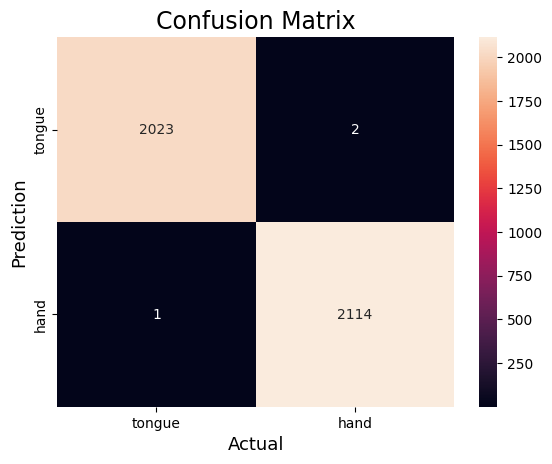

In [307]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['tongue','hand'],
            yticklabels=['tongue','hand'])
# Look at next comment.
# we want to make sure than tongue, hand is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [308]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

0.9992753623188406


### Random Forest

In [309]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [310]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

<ipython-input-310-2584e0968a9b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [311]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

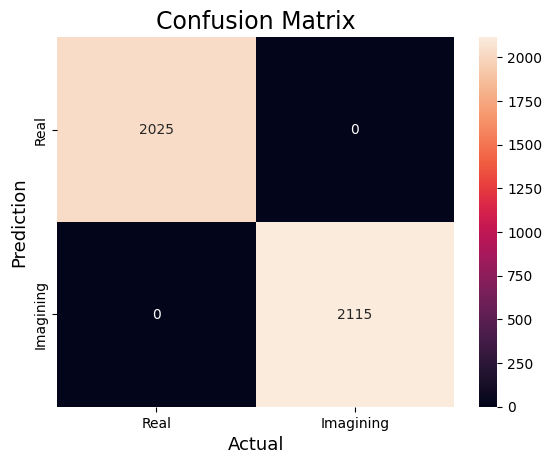

In [312]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [313]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

1.0


# Subject 0 (Time window 2000 time steps)

In [236]:
subject0_Imagery_hands_2000 = pd.read_csv("/content/subject0_Imagery_hands_2000.csv")
subject0_Imagery_tongues_2000 = pd.read_csv("/content/subject0_Imagery_tongues_2000.csv")
subject0_Real_hands_2000 = pd.read_csv("/content/subject0_Real_hands_2000.csv")
subject0_Real_tongues_2000 = pd.read_csv("/content/subject0_Real_tongues_2000.csv")

## Makes data in real and imagery forms

In [237]:
Imagery_frames = [subject0_Imagery_hands_2000, subject0_Imagery_tongues_2000]
Imagery_frames = pd.concat(Imagery_frames)
Imagery_frames['is_execution'] = 0

In [238]:
Real_frames = [subject0_Real_hands_2000, subject0_Real_tongues_2000]
Real_frames = pd.concat(Real_frames)
Real_frames['is_execution'] = 1

In [239]:
whole_dataframe = [Imagery_frames, Real_frames]
whole_dataframe = pd.concat(whole_dataframe)
whole_dataframe = whole_dataframe.astype({'elecro_idx':'string'})
whole_dataframe

,elecro_idx,trial_idx,sub_trial_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,B5_P,B5_RP,is_execution
0,0,1,0,64.208372,0.058936,26.268088,0.024111,8.992230,0.008254,1.662773,0.001526,0.319480,0.000293,0
1,0,1,1,40.340036,0.049763,32.921651,0.040611,8.286542,0.010222,1.633262,0.002015,0.340468,0.000420,0
2,0,3,0,95.032736,0.070099,32.167133,0.023727,9.608515,0.007088,1.359709,0.001003,0.353153,0.000260,0
3,0,3,1,207.406918,0.060584,29.545808,0.008630,7.646323,0.002234,1.559712,0.000456,0.306466,0.000090,0
4,0,4,0,62.372128,0.051644,27.214559,0.022534,6.781020,0.005615,1.312397,0.001087,0.312094,0.000258,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,45,56,1,1025.123522,0.079350,71.822657,0.005559,7.213176,0.000558,1.372350,0.000106,0.284276,0.000022,1
2756,45,58,0,1348.359458,0.149950,66.411932,0.007386,8.201165,0.000912,1.509035,0.000168,0.371192,0.000041,1
2757,45,58,1,1291.338752,0.128585,81.084990,0.008074,6.594006,0.000657,1.430860,0.000142,0.309141,0.000031,1
2758,45,59,0,602.142338,0.076327,66.250427,0.008398,7.153753,0.000907,1.359199,0.000172,0.314774,0.000040,1


In [240]:
df_onehot = pd.get_dummies(whole_dataframe['elecro_idx'])

In [241]:
whole_dataframe = pd.concat([whole_dataframe, df_onehot], axis=1)
whole_dataframe = whole_dataframe.drop(['elecro_idx'], axis=1) # Deleting electro_idx column after we did one hot encoding
whole_dataframe

,trial_idx,sub_trial_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,...,41,42,43,44,45,5,6,7,8,9
0,1,0,64.208372,0.058936,26.268088,0.024111,8.992230,0.008254,1.662773,0.001526,...,0,0,0,0,0,0,0,0,0,0
1,1,1,40.340036,0.049763,32.921651,0.040611,8.286542,0.010222,1.633262,0.002015,...,0,0,0,0,0,0,0,0,0,0
2,3,0,95.032736,0.070099,32.167133,0.023727,9.608515,0.007088,1.359709,0.001003,...,0,0,0,0,0,0,0,0,0,0
3,3,1,207.406918,0.060584,29.545808,0.008630,7.646323,0.002234,1.559712,0.000456,...,0,0,0,0,0,0,0,0,0,0
4,4,0,62.372128,0.051644,27.214559,0.022534,6.781020,0.005615,1.312397,0.001087,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,56,1,1025.123522,0.079350,71.822657,0.005559,7.213176,0.000558,1.372350,0.000106,...,0,0,0,0,1,0,0,0,0,0
2756,58,0,1348.359458,0.149950,66.411932,0.007386,8.201165,0.000912,1.509035,0.000168,...,0,0,0,0,1,0,0,0,0,0
2757,58,1,1291.338752,0.128585,81.084990,0.008074,6.594006,0.000657,1.430860,0.000142,...,0,0,0,0,1,0,0,0,0,0
2758,59,0,602.142338,0.076327,66.250427,0.008398,7.153753,0.000907,1.359199,0.000172,...,0,0,0,0,1,0,0,0,0,0


In [242]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [243]:
whole_dataframe.columns

Index(['trial_idx', 'sub_trial_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P',
       'B3_RP', 'B4_P', 'B4_RP', 'B5_P', 'B5_RP', 'is_execution', '0', '1',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42',
       '43', '44', '45', '5', '6', '7', '8', '9'],
      dtype='object')

In [244]:
features = ['B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P',
       'B3_RP', 'B4_P', 'B4_RP', 'B5_P', 'B5_RP', 'is_execution', '0', '1',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42',
       '43', '44', '45', '5', '6', '7', '8', '9']
X = whole_dataframe.loc[:, features]
y = whole_dataframe.loc[:, ['is_execution']]

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

### SCV

In [246]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [247]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [248]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

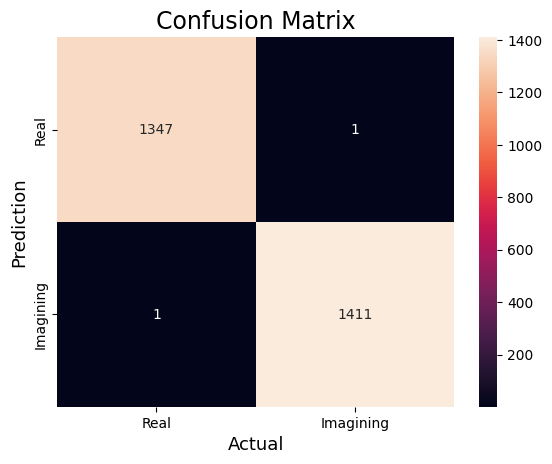

In [249]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [250]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

0.9992753623188406


### Random Forest

In [251]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [252]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

<ipython-input-252-2584e0968a9b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [253]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

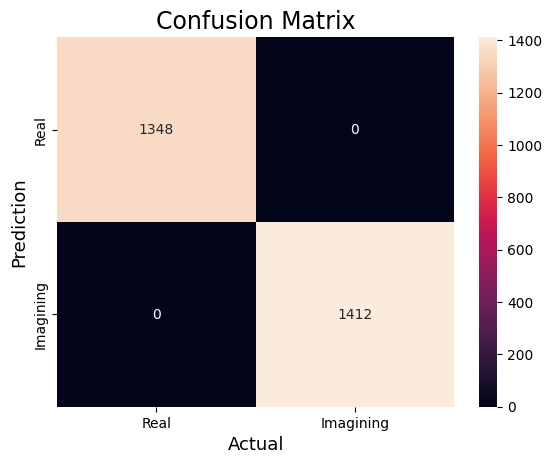

In [254]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [255]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

1.0


## Makes data in hands and tongues forms

In [256]:
hand_frames = [subject0_Imagery_hands_2000, subject0_Real_hands_2000]
hand_frames = pd.concat(hand_frames)
hand_frames['is_tongue'] = 0

In [257]:
tongues_frames = [subject0_Imagery_tongues_2000, subject0_Real_tongues_2000]
tongues_frames = pd.concat(tongues_frames)
tongues_frames['is_tongue'] = 1

In [258]:
whole_dataframe = [hand_frames, tongues_frames]
whole_dataframe = pd.concat(whole_dataframe)
whole_dataframe = whole_dataframe.astype({'elecro_idx':'string'})
whole_dataframe

,elecro_idx,trial_idx,sub_trial_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,B5_P,B5_RP,is_tongue
0,0,1,0,64.208372,0.058936,26.268088,0.024111,8.992230,0.008254,1.662773,0.001526,0.319480,0.000293,0
1,0,1,1,40.340036,0.049763,32.921651,0.040611,8.286542,0.010222,1.633262,0.002015,0.340468,0.000420,0
2,0,3,0,95.032736,0.070099,32.167133,0.023727,9.608515,0.007088,1.359709,0.001003,0.353153,0.000260,0
3,0,3,1,207.406918,0.060584,29.545808,0.008630,7.646323,0.002234,1.559712,0.000456,0.306466,0.000090,0
4,0,4,0,62.372128,0.051644,27.214559,0.022534,6.781020,0.005615,1.312397,0.001087,0.312094,0.000258,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,45,56,1,1025.123522,0.079350,71.822657,0.005559,7.213176,0.000558,1.372350,0.000106,0.284276,0.000022,1
2756,45,58,0,1348.359458,0.149950,66.411932,0.007386,8.201165,0.000912,1.509035,0.000168,0.371192,0.000041,1
2757,45,58,1,1291.338752,0.128585,81.084990,0.008074,6.594006,0.000657,1.430860,0.000142,0.309141,0.000031,1
2758,45,59,0,602.142338,0.076327,66.250427,0.008398,7.153753,0.000907,1.359199,0.000172,0.314774,0.000040,1


In [259]:
df_onehot = pd.get_dummies(whole_dataframe['elecro_idx'])

In [260]:
whole_dataframe = pd.concat([whole_dataframe, df_onehot], axis=1)
whole_dataframe = whole_dataframe.drop(['elecro_idx'], axis=1) # Deleting electro_idx column after we did one hot encoding
whole_dataframe

,trial_idx,sub_trial_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,...,41,42,43,44,45,5,6,7,8,9
0,1,0,64.208372,0.058936,26.268088,0.024111,8.992230,0.008254,1.662773,0.001526,...,0,0,0,0,0,0,0,0,0,0
1,1,1,40.340036,0.049763,32.921651,0.040611,8.286542,0.010222,1.633262,0.002015,...,0,0,0,0,0,0,0,0,0,0
2,3,0,95.032736,0.070099,32.167133,0.023727,9.608515,0.007088,1.359709,0.001003,...,0,0,0,0,0,0,0,0,0,0
3,3,1,207.406918,0.060584,29.545808,0.008630,7.646323,0.002234,1.559712,0.000456,...,0,0,0,0,0,0,0,0,0,0
4,4,0,62.372128,0.051644,27.214559,0.022534,6.781020,0.005615,1.312397,0.001087,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2755,56,1,1025.123522,0.079350,71.822657,0.005559,7.213176,0.000558,1.372350,0.000106,...,0,0,0,0,1,0,0,0,0,0
2756,58,0,1348.359458,0.149950,66.411932,0.007386,8.201165,0.000912,1.509035,0.000168,...,0,0,0,0,1,0,0,0,0,0
2757,58,1,1291.338752,0.128585,81.084990,0.008074,6.594006,0.000657,1.430860,0.000142,...,0,0,0,0,1,0,0,0,0,0
2758,59,0,602.142338,0.076327,66.250427,0.008398,7.153753,0.000907,1.359199,0.000172,...,0,0,0,0,1,0,0,0,0,0


In [261]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [262]:
whole_dataframe.columns

Index(['trial_idx', 'sub_trial_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P',
       'B3_RP', 'B4_P', 'B4_RP', 'B5_P', 'B5_RP', 'is_tongue', '0', '1', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43',
       '44', '45', '5', '6', '7', '8', '9'],
      dtype='object')

In [263]:
features = ['B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P',
       'B3_RP', 'B4_P', 'B4_RP', 'B5_P', 'B5_RP', 'is_tongue', '0', '1',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42',
       '43', '44', '45', '5', '6', '7', '8', '9']
X = whole_dataframe.loc[:, features]
y = whole_dataframe.loc[:, ['is_tongue']]

In [264]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

### SCV

In [265]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [266]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [267]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

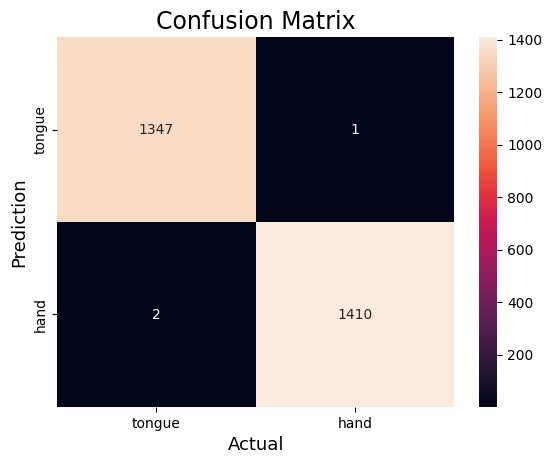

In [268]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['tongue','hand'],
            yticklabels=['tongue','hand'])
# Look at next comment.
# we want to make sure than tongue, hand is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [269]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

0.9989130434782608


### Random Forest

In [270]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [271]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

<ipython-input-271-2584e0968a9b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [272]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

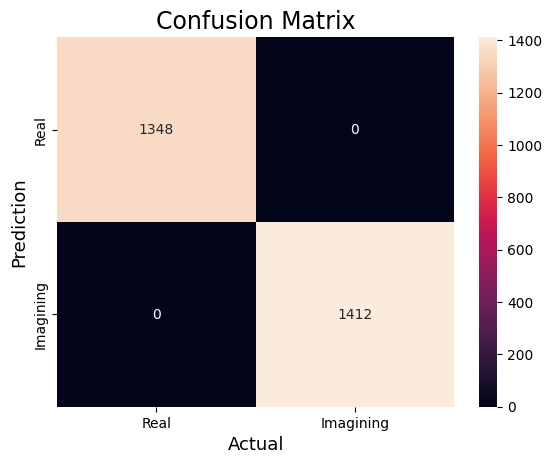

In [273]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [274]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

1.0


# Subject 0 (Time window 3000 time steps)

In [197]:
subject0_Imagery_hands_3000 = pd.read_csv("/content/subject0_Imagery_hands_3000.csv")
subject0_Imagery_tongues_3000 = pd.read_csv("/content/subject0_Imagery_tongues_3000.csv")
subject0_Real_hands_3000 = pd.read_csv("/content/subject0_Real_hands_3000.csv")
subject0_Real_tongues_3000 = pd.read_csv("/content/subject0_Real_tongues_3000.csv")

## Makes data in real and imagery forms

In [198]:
Imagery_frames = [subject0_Imagery_hands_3000, subject0_Imagery_tongues_3000]
Imagery_frames = pd.concat(Imagery_frames)
Imagery_frames['is_execution'] = 0

In [199]:
Real_frames = [subject0_Real_hands_3000, subject0_Real_tongues_3000]
Real_frames = pd.concat(Real_frames)
Real_frames['is_execution'] = 1

In [200]:
whole_dataframe = [Imagery_frames, Real_frames]
whole_dataframe = pd.concat(whole_dataframe)
whole_dataframe = whole_dataframe.astype({'elecro_idx':'string'})
whole_dataframe

,elecro_idx,trial_idx,sub_trial_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,B5_P,B5_RP,is_execution
0,0,1,0,39.877953,0.032154,30.649355,0.024713,8.482389,0.006839,1.511890,0.001219,0.313736,0.000253,0
1,0,3,0,167.824757,0.062980,31.110097,0.011675,8.520713,0.003198,1.450809,0.000544,0.348641,0.000131,0
2,0,4,0,90.816118,0.038268,38.089240,0.016050,6.291282,0.002651,1.373339,0.000579,0.326878,0.000138,0
3,0,5,0,178.175423,0.163852,56.039463,0.051535,12.546013,0.011537,1.703892,0.001567,0.372688,0.000343,0
4,0,7,0,213.735973,0.039120,51.214147,0.009374,17.320054,0.003170,5.723900,0.001048,1.839272,0.000337,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,45,53,0,398.961102,0.088290,67.862586,0.015018,10.114526,0.002238,1.311821,0.000290,0.400399,0.000089,1
1376,45,55,0,311.017572,0.047528,46.800234,0.007152,8.090780,0.001236,1.513260,0.000231,0.279448,0.000043,1
1377,45,56,0,778.246740,0.083111,66.938824,0.007149,7.815448,0.000835,1.357285,0.000145,0.381476,0.000041,1
1378,45,58,0,1035.950782,0.112754,57.965059,0.006309,7.271817,0.000791,1.408659,0.000153,0.334514,0.000036,1


In [201]:
df_onehot = pd.get_dummies(whole_dataframe['elecro_idx'])

In [202]:
whole_dataframe = pd.concat([whole_dataframe, df_onehot], axis=1)
whole_dataframe = whole_dataframe.drop(['elecro_idx'], axis=1) # Deleting electro_idx column after we did one hot encoding
whole_dataframe

,trial_idx,sub_trial_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,...,41,42,43,44,45,5,6,7,8,9
0,1,0,39.877953,0.032154,30.649355,0.024713,8.482389,0.006839,1.511890,0.001219,...,0,0,0,0,0,0,0,0,0,0
1,3,0,167.824757,0.062980,31.110097,0.011675,8.520713,0.003198,1.450809,0.000544,...,0,0,0,0,0,0,0,0,0,0
2,4,0,90.816118,0.038268,38.089240,0.016050,6.291282,0.002651,1.373339,0.000579,...,0,0,0,0,0,0,0,0,0,0
3,5,0,178.175423,0.163852,56.039463,0.051535,12.546013,0.011537,1.703892,0.001567,...,0,0,0,0,0,0,0,0,0,0
4,7,0,213.735973,0.039120,51.214147,0.009374,17.320054,0.003170,5.723900,0.001048,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,53,0,398.961102,0.088290,67.862586,0.015018,10.114526,0.002238,1.311821,0.000290,...,0,0,0,0,1,0,0,0,0,0
1376,55,0,311.017572,0.047528,46.800234,0.007152,8.090780,0.001236,1.513260,0.000231,...,0,0,0,0,1,0,0,0,0,0
1377,56,0,778.246740,0.083111,66.938824,0.007149,7.815448,0.000835,1.357285,0.000145,...,0,0,0,0,1,0,0,0,0,0
1378,58,0,1035.950782,0.112754,57.965059,0.006309,7.271817,0.000791,1.408659,0.000153,...,0,0,0,0,1,0,0,0,0,0


In [203]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [204]:
whole_dataframe.columns

Index(['trial_idx', 'sub_trial_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P',
       'B3_RP', 'B4_P', 'B4_RP', 'B5_P', 'B5_RP', 'is_execution', '0', '1',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42',
       '43', '44', '45', '5', '6', '7', '8', '9'],
      dtype='object')

In [205]:
features = ['B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P',
       'B3_RP', 'B4_P', 'B4_RP', 'B5_P', 'B5_RP', 'is_execution', '0', '1',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42',
       '43', '44', '45', '5', '6', '7', '8', '9']
X = whole_dataframe.loc[:, features]
y = whole_dataframe.loc[:, ['is_execution']]

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

### SCV

In [207]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [208]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [209]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

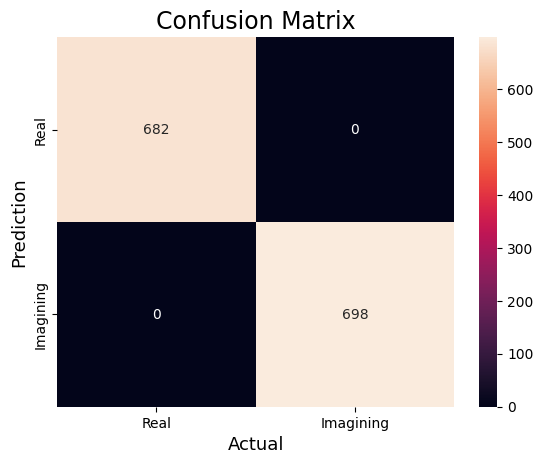

In [210]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [211]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

1.0


### Random Forest

In [212]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [213]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

<ipython-input-213-2584e0968a9b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [214]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

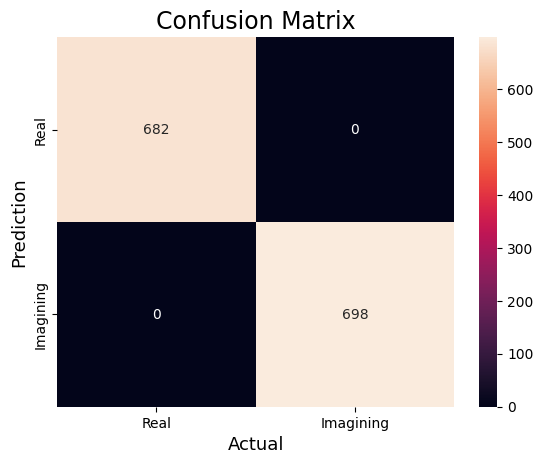

In [215]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [216]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

1.0


## Makes data in hands and tongues forms

In [217]:
hand_frames = [subject0_Imagery_hands_3000, subject0_Real_hands_3000]
hand_frames = pd.concat(hand_frames)
hand_frames['is_tongue'] = 0

In [218]:
tongues_frames = [subject0_Imagery_tongues_3000, subject0_Real_tongues_3000]
tongues_frames = pd.concat(tongues_frames)
tongues_frames['is_tongue'] = 1

In [219]:
whole_dataframe = [hand_frames, tongues_frames]
whole_dataframe = pd.concat(whole_dataframe)
whole_dataframe = whole_dataframe.astype({'elecro_idx':'string'})
whole_dataframe

,elecro_idx,trial_idx,sub_trial_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,B5_P,B5_RP,is_tongue
0,0,1,0,39.877953,0.032154,30.649355,0.024713,8.482389,0.006839,1.511890,0.001219,0.313736,0.000253,0
1,0,3,0,167.824757,0.062980,31.110097,0.011675,8.520713,0.003198,1.450809,0.000544,0.348641,0.000131,0
2,0,4,0,90.816118,0.038268,38.089240,0.016050,6.291282,0.002651,1.373339,0.000579,0.326878,0.000138,0
3,0,5,0,178.175423,0.163852,56.039463,0.051535,12.546013,0.011537,1.703892,0.001567,0.372688,0.000343,0
4,0,7,0,213.735973,0.039120,51.214147,0.009374,17.320054,0.003170,5.723900,0.001048,1.839272,0.000337,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,45,53,0,398.961102,0.088290,67.862586,0.015018,10.114526,0.002238,1.311821,0.000290,0.400399,0.000089,1
1376,45,55,0,311.017572,0.047528,46.800234,0.007152,8.090780,0.001236,1.513260,0.000231,0.279448,0.000043,1
1377,45,56,0,778.246740,0.083111,66.938824,0.007149,7.815448,0.000835,1.357285,0.000145,0.381476,0.000041,1
1378,45,58,0,1035.950782,0.112754,57.965059,0.006309,7.271817,0.000791,1.408659,0.000153,0.334514,0.000036,1


In [220]:
df_onehot = pd.get_dummies(whole_dataframe['elecro_idx'])

In [221]:
whole_dataframe = pd.concat([whole_dataframe, df_onehot], axis=1)
whole_dataframe = whole_dataframe.drop(['elecro_idx'], axis=1) # Deleting electro_idx column after we did one hot encoding
whole_dataframe

,trial_idx,sub_trial_idx,B1_P,B1_RP,B2_P,B2_RP,B3_P,B3_RP,B4_P,B4_RP,...,41,42,43,44,45,5,6,7,8,9
0,1,0,39.877953,0.032154,30.649355,0.024713,8.482389,0.006839,1.511890,0.001219,...,0,0,0,0,0,0,0,0,0,0
1,3,0,167.824757,0.062980,31.110097,0.011675,8.520713,0.003198,1.450809,0.000544,...,0,0,0,0,0,0,0,0,0,0
2,4,0,90.816118,0.038268,38.089240,0.016050,6.291282,0.002651,1.373339,0.000579,...,0,0,0,0,0,0,0,0,0,0
3,5,0,178.175423,0.163852,56.039463,0.051535,12.546013,0.011537,1.703892,0.001567,...,0,0,0,0,0,0,0,0,0,0
4,7,0,213.735973,0.039120,51.214147,0.009374,17.320054,0.003170,5.723900,0.001048,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,53,0,398.961102,0.088290,67.862586,0.015018,10.114526,0.002238,1.311821,0.000290,...,0,0,0,0,1,0,0,0,0,0
1376,55,0,311.017572,0.047528,46.800234,0.007152,8.090780,0.001236,1.513260,0.000231,...,0,0,0,0,1,0,0,0,0,0
1377,56,0,778.246740,0.083111,66.938824,0.007149,7.815448,0.000835,1.357285,0.000145,...,0,0,0,0,1,0,0,0,0,0
1378,58,0,1035.950782,0.112754,57.965059,0.006309,7.271817,0.000791,1.408659,0.000153,...,0,0,0,0,1,0,0,0,0,0


In [222]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [223]:
whole_dataframe.columns

Index(['trial_idx', 'sub_trial_idx', 'B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P',
       'B3_RP', 'B4_P', 'B4_RP', 'B5_P', 'B5_RP', 'is_tongue', '0', '1', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21',
       '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43',
       '44', '45', '5', '6', '7', '8', '9'],
      dtype='object')

In [224]:
features = ['B1_P', 'B1_RP', 'B2_P', 'B2_RP', 'B3_P',
       'B3_RP', 'B4_P', 'B4_RP', 'B5_P', 'B5_RP', 'is_tongue', '0', '1',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31',
       '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42',
       '43', '44', '45', '5', '6', '7', '8', '9']
X = whole_dataframe.loc[:, features]
y = whole_dataframe.loc[:, ['is_tongue']]

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)

### SCV

In [226]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [227]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [228]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

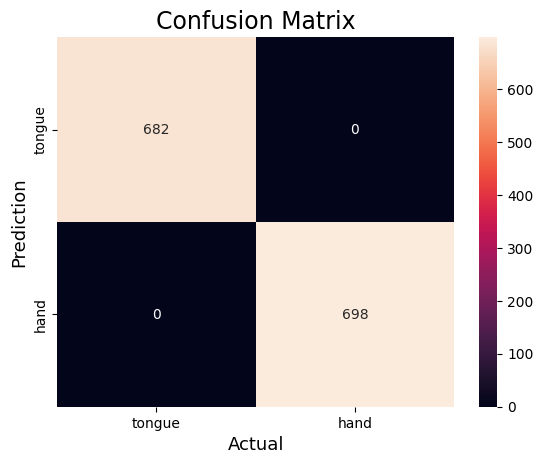

In [229]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['tongue','hand'],
            yticklabels=['tongue','hand'])
# Look at next comment.
# we want to make sure than tongue, hand is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [230]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

1.0


### Random Forest

In [231]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [232]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

<ipython-input-232-2584e0968a9b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,y_train)


In [233]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

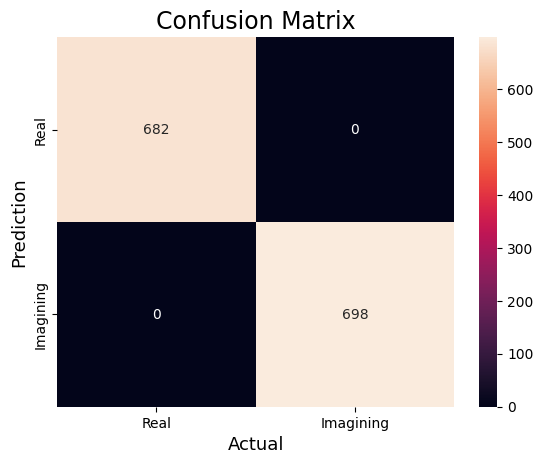

In [234]:
#Plot the confusion matrix.
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Imagining'],
            yticklabels=['Real','Imagining'])
# Look at next comment.
# we want to make sure than Real, Imagining is written in the right order.
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [235]:
from sklearn.metrics import accuracy_score
import numpy as np
print(accuracy_score( y_test, y_pred))

1.0
